# Poisonous Mushrooms Classification

## 1. Importing required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,matthews_corrcoef, roc_auc_score, confusion_matrix, accuracy_score, roc_curve, auc,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sb
from sklearn.linear_model import LogisticRegression

## 2. Reading CSV Data

In [2]:
dfmushroom = pd.read_csv('mushrooms.csv')
dfmushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


## 3. Translating Alphabetical signs into words from 'Mushroom Notes.txt' notes

In [3]:
dfmushroom['class'] = dfmushroom['class'].apply(lambda x: 'poisonous' if x == 'p' else ('non-poisonous' if x == 'e' else np.NaN))
dfmushroom['cap-shape'] = dfmushroom['cap-shape'].apply(
    lambda x: 'bell' if x == 'b' else (
        'conical' if x == 'c' else (
        'convex' if x == 'x' else (
        'flat' if x == 'f' else (
        'knobbed' if x == 'k' else(
        'sunken' if x == 's' else np.NaN
))))))
dfmushroom['cap-surface'] = dfmushroom['cap-surface'].apply(
    lambda x: 'fibrous' if x == 'f' else (
    'grooves' if x == 'g' else(
    'scaly' if x == 'y' else(
    'smooth' if x == 's' else np.NaN)))
)
dfmushroom['cap-color'] = dfmushroom['cap-color'].apply(
    lambda x: 'brown' if x == 'n' else(
    'buff' if x == 'b' else(
    'cinnamon' if x == 'c' else(
    'gray' if x == 'g' else(
    'green' if x == 'r' else(
    'pink' if x == 'p' else(
    'purple' if x == 'u' else(
    'red' if x == 'e' else(
    'white' if x == 'w' else(
    'yellow' if x == 'y' else np.NaN
    )))))))))
)
dfmushroom['bruises'] = dfmushroom['bruises'].apply(
    lambda x: 'bruises' if x == 't' else(
    'no' if x == 'f' else np.NaN)
)
dfmushroom['odor'] = dfmushroom['odor'].apply(
    lambda x: 'almond' if x == 'a' else(
    'anise' if x == 'l' else(
    'creosote' if x == 'c' else(
    'fishy' if x == 'y' else(
    'foul' if x == 'f' else(
    'musty' if x == 'm' else(
    'none' if x == 'n' else(
    'pungent' if x == 'p' else(
    'spicy' if x == 's' else np.NaN
    ))))))))
)
dfmushroom['gill-attachment'] = dfmushroom['gill-attachment'].apply(
    lambda x: 'attached' if x == 'a' else(
    'descending' if x == 'd' else(
    'free' if x == 'f' else(
    'notched' if x == 'n' else np.NaN
    )))
)
dfmushroom['gill-spacing'] = dfmushroom['gill-spacing'].apply(
    lambda x: 'close' if x == 'c' else(
    'crowded' if x == 'w' else(
    'distant' if x == 'd' else np.NaN))
)
dfmushroom['gill-size'] = dfmushroom['gill-size'].apply(
    lambda x: 'broad' if x == 'b' else(
    'narrow' if x == 'n' else np.NaN)
)
dfmushroom['gill-color'] = dfmushroom['gill-color'].apply(
    lambda x: 'black' if x == 'k' else(
    'brown' if x == 'n' else(
    'buff' if x == 'b' else(
    'chocolate' if x == 'h' else(
    'gray' if x == 'g' else(
    'green' if x == 'r' else(
    'orange' if x == 'o' else(
    'pink' if x == 'p' else(
    'purple' if x == 'u' else(
    'red' if x == 'e' else(
    'white' if x == 'w' else(
    'yellow' if x == 'y' else np.NaN
    )))))))))))
)
dfmushroom['stalk-shape'] = dfmushroom['stalk-shape'].apply(
    lambda x: 'enlarging' if x == 'e' else(
    'tapering' if x == 't' else np.NaN)
)
dfmushroom['stalk-root'] = dfmushroom['stalk-root'].apply(
    lambda x: 'bulbous' if x == 'b' else(
    'club' if x == 'c' else(
    'cup' if x == 'u' else(
    'equal' if x == 'e' else(
    'rhizomorphs' if x == 'z' else(
    'rooted' if x == 'r' else(
    'missing' if x == '?' else np.NaN
    ))))))
)
dfmushroom['stalk-surface-above-ring'] = dfmushroom['stalk-surface-above-ring'].apply(
    lambda x: 'fibrous' if x == 'f' else(
    'scaly' if x == 'y' else(
    'silky' if x == 'k' else(
    'smooth' if x == 's' else np.NaN)))
)
dfmushroom['stalk-surface-below-ring'] = dfmushroom['stalk-surface-below-ring'].apply(
    lambda x: 'fibrous' if x == 'f' else(
    'scaly' if x == 'y' else(
    'silky' if x == 'k' else(
    'smooth' if x == 's' else np.NaN)))
)
dfmushroom['stalk-color-above-ring'] = dfmushroom['stalk-color-above-ring'].apply(
    lambda x: 'brown' if x == 'n' else(
    'buff' if x == 'b' else(
    'cinnamon' if x == 'c' else(
    'gray' if x == 'g' else(
    'orange' if x == 'o' else(
    'pink' if x == 'p' else(
    'red' if x == 'e' else(
    'white' if x == 'w' else(
    'yellow' if x == 'y' else np.NaN
    ))))))))
)
dfmushroom['stalk-color-below-ring'] = dfmushroom['stalk-color-below-ring'].apply(
    lambda x: 'brown' if x == 'n' else(
    'buff' if x == 'b' else(
    'cinnamon' if x == 'c' else(
    'gray' if x == 'g' else(
    'orange' if x == 'o' else(
    'pink' if x == 'p' else(
    'red' if x == 'e' else(
    'white' if x == 'w' else(
    'yellow' if x == 'y' else np.NaN
    ))))))))
)
dfmushroom['veil-color'] = dfmushroom['veil-color'].apply(
    lambda x: 'brown' if x == 'n' else(
    'orange' if x == 'o' else(
    'white' if x == 'w' else(
    'yellow' if x == 'y' else np.NaN)))
)
dfmushroom['ring-number'] = dfmushroom['ring-number'].apply(
    lambda x: 'none' if x == 'n' else(
    'one' if x == 'o' else(
    'two' if x == 't' else np.NaN))
)
dfmushroom['ring-type'] = dfmushroom['ring-type'].apply(
    lambda x: 'cobwebby' if x == 'c' else(
    'evanescent' if x == 'e' else(
    'flaring' if x == 'f' else(
    'large' if x == 'l' else(
    'none' if x == 'n' else(
    'pendant' if x == 'p' else(
    'sheathing' if x == 's' else(
    'zone' if x == 'z' else np.NaN)))))))
)
dfmushroom['spore-print-color'] = dfmushroom['spore-print-color'].apply(
    lambda x: 'black' if x == 'k' else(
    'brown' if x == 'n' else(
    'buff' if x == 'b' else(
    'chocolate' if x == 'h' else(
    'green' if x == 'r' else(
    'orange' if x == 'o' else(
    'purple' if x == 'u' else(
    'white' if x == 'w' else(
    'yellow' if x == 'y' else np.NaN
    ))))))))
)
dfmushroom['population'] = dfmushroom['population'].apply(
    lambda x: 'abundant' if x == 'a' else(
    'clustered' if x == 'c' else(
    'numerous' if x == 'n' else(
    'scattered' if x == 's' else(
    'several' if x == 'v' else(
    'solitary' if x == 'y' else np.NaN
    )))))
)
dfmushroom['habitat'] = dfmushroom['habitat'].apply(
    lambda x: 'grasses' if x == 'g' else(
    'leaves' if x == 'l' else(
    'meadows' if x == 'm' else(
    'paths' if x == 'p' else(
    'urban' if x == 'u' else(
    'waste' if x == 'w' else(
    'woods' if x == 'd' else np.NaN))))))
)
dfmushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,non-poisonous,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,non-poisonous,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,non-poisonous,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,non-poisonous,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves
8120,non-poisonous,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,smooth,orange,orange,brown,one,pendant,buff,several,leaves
8121,non-poisonous,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,smooth,silky,white,white,white,one,evanescent,white,several,leaves


## 4. Data Visualisation

In [4]:
dfmushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
dfmushroom['class'].value_counts()

non-poisonous    4208
poisonous        3916
Name: class, dtype: int64

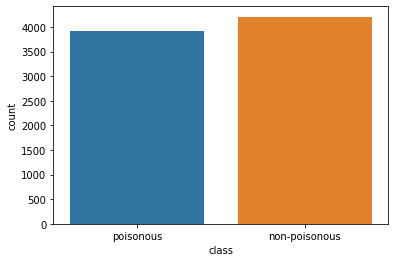

In [6]:
sb.countplot(x=dfmushroom['class'])

In [7]:
dfmushroom['cap-shape'].value_counts()

convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: cap-shape, dtype: int64

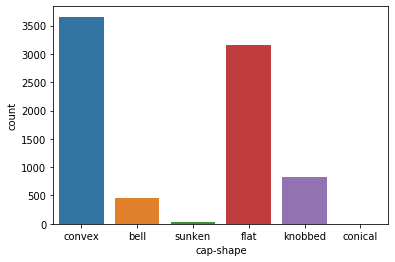

In [8]:
sb.countplot(x=dfmushroom['cap-shape'])

In [9]:
dfmushroom['cap-surface'].value_counts()

scaly      3244
smooth     2556
fibrous    2320
grooves       4
Name: cap-surface, dtype: int64

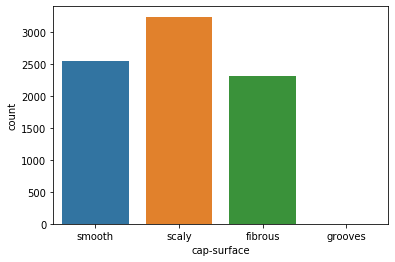

In [10]:
sb.countplot(x=dfmushroom['cap-surface'])

In [11]:
dfmushroom['bruises'].value_counts()

no         4748
bruises    3376
Name: bruises, dtype: int64

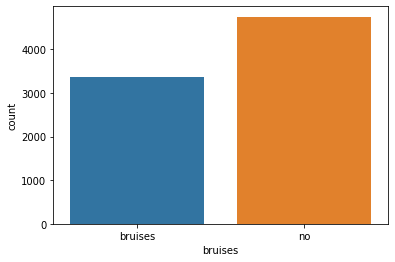

In [12]:
sb.countplot(x=dfmushroom['bruises'])

In [13]:
dfmushroom['odor'].value_counts()

none        3528
foul        2160
spicy        576
fishy        576
anise        400
almond       400
pungent      256
creosote     192
musty         36
Name: odor, dtype: int64

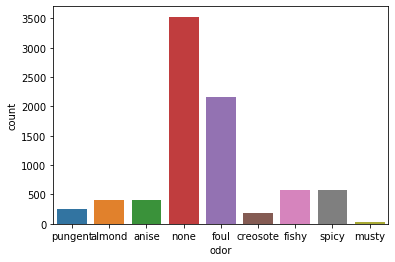

In [14]:
sb.countplot(x=dfmushroom['odor'])

In [15]:
dfmushroom['gill-attachment'].value_counts()

free        7914
attached     210
Name: gill-attachment, dtype: int64

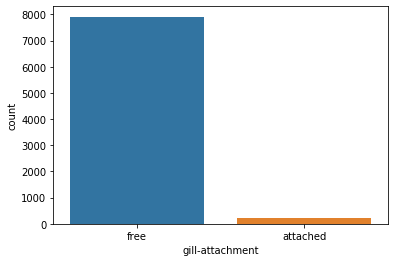

In [16]:
sb.countplot(x=dfmushroom['gill-attachment'])

In [17]:
dfmushroom['gill-spacing'].value_counts()

close      6812
crowded    1312
Name: gill-spacing, dtype: int64

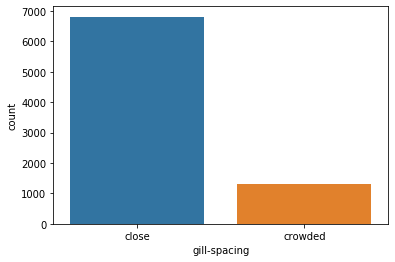

In [18]:
sb.countplot(x=dfmushroom['gill-spacing'])

In [19]:
dfmushroom['gill-size'].value_counts()

broad     5612
narrow    2512
Name: gill-size, dtype: int64

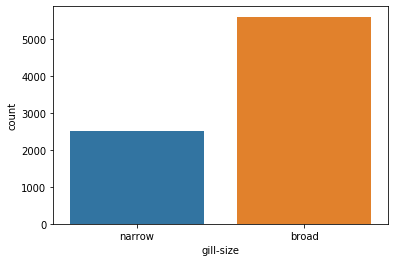

In [20]:
sb.countplot(x=dfmushroom['gill-size'])

In [21]:
dfmushroom['gill-color'].value_counts()

buff         1728
pink         1492
white        1202
brown        1048
gray          752
chocolate     732
purple        492
black         408
red            96
yellow         86
orange         64
green          24
Name: gill-color, dtype: int64

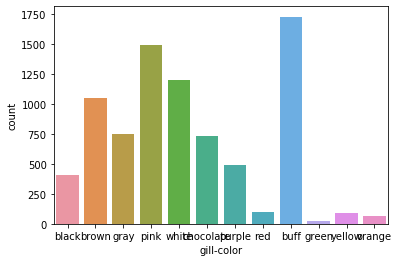

In [22]:
sb.countplot(x=dfmushroom['gill-color'])

In [23]:
dfmushroom['stalk-shape'].value_counts()

tapering     4608
enlarging    3516
Name: stalk-shape, dtype: int64

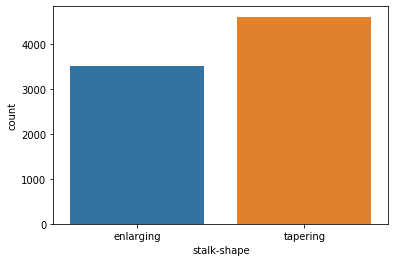

In [24]:
sb.countplot(x=dfmushroom['stalk-shape'])

In [25]:
dfmushroom['stalk-root'].value_counts()

bulbous    3776
missing    2480
equal      1120
club        556
rooted      192
Name: stalk-root, dtype: int64

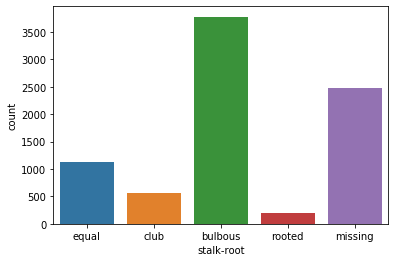

In [26]:
sb.countplot(x=dfmushroom['stalk-root'])

In [27]:
dfmushroom['stalk-surface-above-ring'].value_counts()

smooth     5176
silky      2372
fibrous     552
scaly        24
Name: stalk-surface-above-ring, dtype: int64

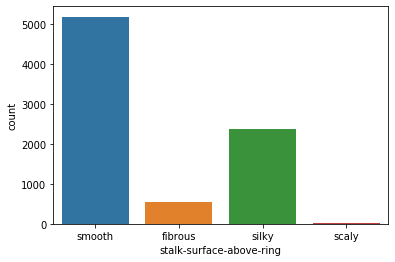

In [28]:
sb.countplot(x=dfmushroom['stalk-surface-above-ring'])

In [29]:
dfmushroom['stalk-surface-below-ring'].value_counts()

smooth     4936
silky      2304
fibrous     600
scaly       284
Name: stalk-surface-below-ring, dtype: int64

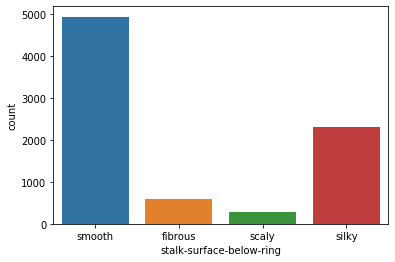

In [30]:
sb.countplot(x=dfmushroom['stalk-surface-below-ring'])

In [31]:
dfmushroom['stalk-color-above-ring'].value_counts()

white       4464
pink        1872
gray         576
brown        448
buff         432
orange       192
red           96
cinnamon      36
yellow         8
Name: stalk-color-above-ring, dtype: int64

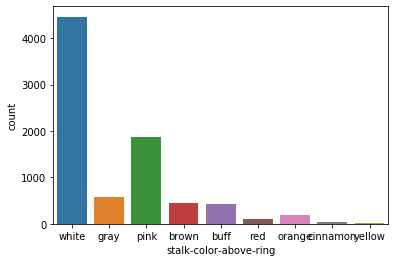

In [32]:
sb.countplot(x=dfmushroom['stalk-color-above-ring'])

In [33]:
dfmushroom['stalk-color-below-ring'].value_counts()

white       4384
pink        1872
gray         576
brown        512
buff         432
orange       192
red           96
cinnamon      36
yellow        24
Name: stalk-color-below-ring, dtype: int64

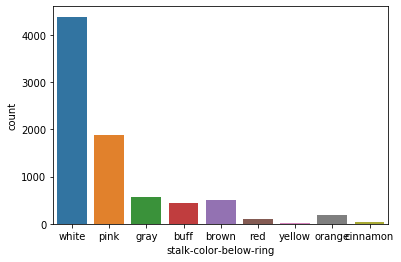

In [34]:
sb.countplot(x=dfmushroom['stalk-color-below-ring'])

In [35]:
dfmushroom['veil-color'].value_counts()

white     7924
brown       96
orange      96
yellow       8
Name: veil-color, dtype: int64

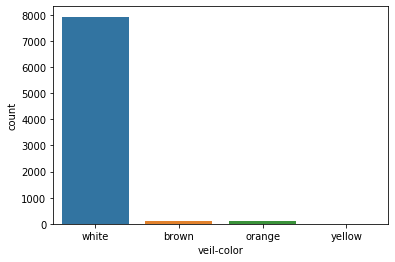

In [36]:
sb.countplot(x=dfmushroom['veil-color'])

In [37]:
dfmushroom['ring-number'].value_counts()

one     7488
two      600
none      36
Name: ring-number, dtype: int64

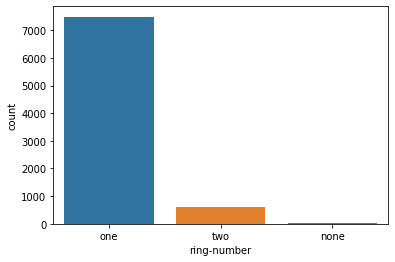

In [38]:
sb.countplot(x=dfmushroom['ring-number'])

In [39]:
dfmushroom['ring-type'].value_counts()

pendant       3968
evanescent    2776
large         1296
flaring         48
none            36
Name: ring-type, dtype: int64

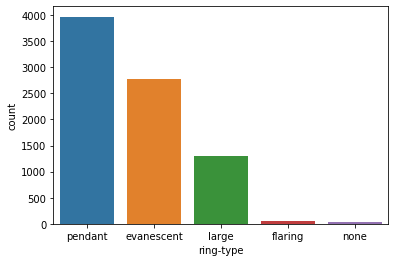

In [40]:
sb.countplot(x=dfmushroom['ring-type'])

In [41]:
dfmushroom['spore-print-color'].value_counts()

white        2388
brown        1968
black        1872
chocolate    1632
green          72
yellow         48
buff           48
purple         48
orange         48
Name: spore-print-color, dtype: int64

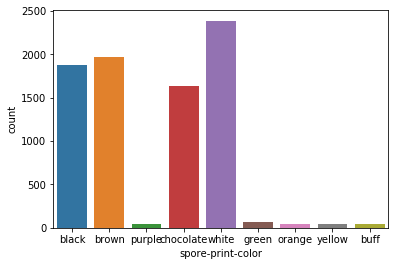

In [42]:
sb.countplot(x=dfmushroom['spore-print-color'])

In [43]:
dfmushroom['population'].value_counts()

several      4040
solitary     1712
scattered    1248
numerous      400
abundant      384
clustered     340
Name: population, dtype: int64

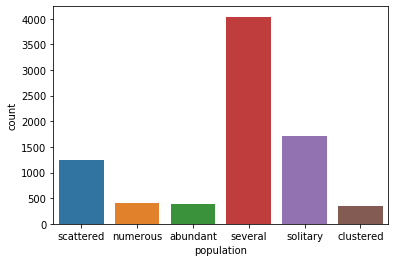

In [44]:
sb.countplot(x=dfmushroom['population'])

In [45]:
dfmushroom['habitat'].value_counts()

woods      3148
grasses    2148
paths      1144
leaves      832
urban       368
meadows     292
waste       192
Name: habitat, dtype: int64

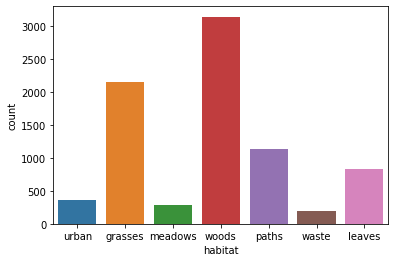

In [46]:
sb.countplot(x=dfmushroom['habitat'])

## 5. Labeling Data using Label Encoder

In [47]:
labelencoder=LabelEncoder()
for col in dfmushroom.columns:
    dfmushroom[col] = labelencoder.fit_transform(dfmushroom[col])
dfmushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,3,7,7,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,3,7,7,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,3,7,7,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,3,7,7,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,3,7,7,2,1,0,1,0,0


## 6. Correlation Matrix

In [48]:
dfmushroom.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.199488,0.186806,0.058452,0.501530,-0.086800,0.129200,-0.348387,0.540024,-0.270247,...,-0.215088,-0.139254,-0.263928,-0.245231,0.145142,-0.214366,-0.411771,0.519438,0.298686,-0.022363
cap-shape,0.199488,1.000000,-0.007059,-0.176574,0.199703,0.251055,0.032099,-0.061368,0.259001,-0.069180,...,-0.070942,-0.068732,-0.059667,-0.067470,0.036995,-0.069245,-0.304673,0.251207,0.129000,0.134210
cap-surface,0.186806,-0.007059,1.000000,-0.022923,0.019547,-0.105749,-0.161757,-0.096076,0.274933,-0.122924,...,0.015424,-0.000094,0.250617,0.260090,-0.154804,0.060429,-0.171361,0.310188,-0.188979,-0.191609
cap-color,0.058452,-0.176574,-0.022923,1.000000,-0.034513,-0.318907,0.192322,0.023269,-0.091914,-0.020306,...,-0.017087,-0.026967,-0.044439,-0.025502,0.188903,0.010226,0.088491,-0.079787,-0.017712,-0.089724
bruises,0.501530,0.199703,0.019547,-0.034513,1.000000,0.079235,-0.137359,0.299473,0.369596,-0.348658,...,-0.386893,-0.323013,-0.197177,-0.213054,-0.119770,-0.056788,-0.692973,0.519982,-0.088137,-0.305354
odor,-0.086800,0.251055,-0.105749,-0.318907,0.079235,1.000000,-0.092471,0.114297,0.037037,0.074913,...,-0.044410,0.060100,-0.012270,-0.026790,-0.086768,0.164708,-0.161269,0.093370,0.003753,0.126054
gill-attachment,0.129200,0.032099,-0.161757,0.192322,-0.137359,-0.092471,1.000000,0.071489,0.108984,-0.080726,...,-0.083189,-0.075554,0.122946,0.116158,0.897518,0.093236,-0.146689,-0.068909,0.165575,0.115387
gill-spacing,-0.348387,-0.061368,-0.096076,0.023269,0.299473,0.114297,0.071489,1.000000,-0.108333,-0.037735,...,-0.298008,-0.241945,0.319259,0.271301,0.073363,0.243014,-0.195897,-0.092992,-0.529253,-0.397884
gill-size,0.540024,0.259001,0.274933,-0.091914,0.369596,0.037037,0.108984,-0.108333,1.000000,-0.330580,...,0.090346,0.087102,0.271111,0.228629,0.103809,-0.171362,-0.460872,0.549444,0.147682,0.088058
gill-color,-0.270247,-0.069180,-0.122924,-0.020306,-0.348658,0.074913,-0.080726,-0.037735,-0.330580,1.000000,...,0.114802,0.057044,-0.064741,-0.101458,-0.048532,0.235151,0.389234,-0.144126,0.027168,0.185011


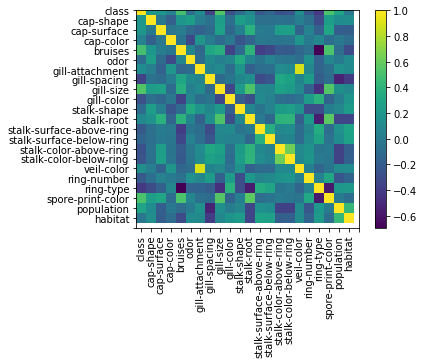

In [49]:
plt.imshow(dfmushroom.corr())
plt.xticks(np.arange(23), dfmushroom.columns, rotation = 90)
plt.yticks(np.arange(23), dfmushroom.columns)
plt.colorbar()

## 7. Train Test Split

In [50]:
xtr,xts,ytr,yts = train_test_split(
    dfmushroom[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']],
    dfmushroom['class'],
    test_size = .1
)

## 8. Applying Models (K-Nearest Neighbour, Logistic Regression, Random Forest Classifier)

In [51]:
def nilai_k():
    k = round((len(xtr)+len(xts)) ** .5)
    if (k % 2 == 0):
        return k + 1
    else:
        return k
    
modelknn = KNeighborsClassifier(
    n_neighbors = nilai_k()
)
modelknn.fit(xtr,ytr)

logmodel = LogisticRegression(solver='lbfgs',max_iter=1000)
logmodel.fit(xtr,ytr)

modelrfc = RandomForestClassifier(n_estimators=100)
modelrfc.fit(xtr,ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 9. Cross Validating Scores of each Models

In [52]:
(cross_val_score(modelrfc,xtr,ytr,cv = 5).mean())

0.9611544248392833

## 10. Prediction, Classification Report, Confusion Matrix, ROC AUC, Accuracy, and Matthews Correlation Coefficient

In [58]:
pred = modelrfc.predict(xts)
predProb = modelrfc.predict_proba(xts)
pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [59]:
print(classification_report(yts,pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       425
           1       0.97      0.95      0.96       388

    accuracy                           0.96       813
   macro avg       0.96      0.96      0.96       813
weighted avg       0.96      0.96      0.96       813



In [60]:
print(confusion_matrix(yts,pred))

[[414  11]
 [ 21 367]]


In [63]:
predict_tr = modelrfc.predict(xtr)
predictProb_tr = modelrfc.predict_proba(xtr)

In [64]:
print(classification_report(ytr,predict_tr))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3783
           1       0.96      0.96      0.96      3528

    accuracy                           0.96      7311
   macro avg       0.96      0.96      0.96      7311
weighted avg       0.96      0.96      0.96      7311



In [65]:
print(confusion_matrix(ytr,predict_tr))

[[3629  154]
 [ 124 3404]]


In [66]:
print('ROC AUC :', roc_auc_score(ytr, predictProb_tr[:,1]))
print('Accuracy :',accuracy_score(ytr, predict_tr))
print('Matthews Corr_coef :',matthews_corrcoef(ytr, predict_tr))

ROC AUC : 0.990895763539357
Accuracy : 0.9619751060046505
Matthews Corr_coef : 0.9239105693022198


In [68]:
print('ROC AUC :', roc_auc_score(yts, predProb[:,1]))
print('Accuracy :',accuracy_score(yts, pred))
print('Matthews Corr_coef :',matthews_corrcoef(yts, pred))

ROC AUC : 0.990018192844148
Accuracy : 0.9606396063960639
Matthews Corr_coef : 0.9213078340461947


## 11. Dumping model into joblib file

In [69]:
import joblib as jb
jb.dump(modelrfc,'modelmushroom')

['modelmushroom']